In [1]:
import tensorflow as tf
import numpy as np

In [2]:
dataset = tf.keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = dataset
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [3]:
print(X_train.shape)

(55000, 28, 28)


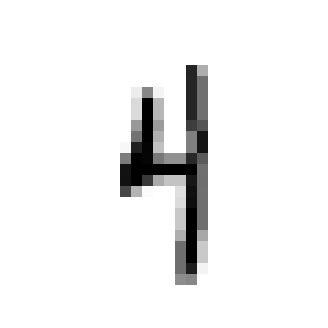

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(X_test[65], cmap="binary")
plt.axis("off")
plt.show()

In [5]:
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="selu"),
    tf.keras.layers.Dense(30, activation="selu"),
])
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="selu", input_shape=[30]),
    tf.keras.layers.Dense(28*28, activation="sigmoid"),
    tf.keras.layers.Reshape([28,28])    
])
ae = tf.keras.Sequential([encoder, decoder])
ae.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0418 - mae: 0.1044 - val_loss: 0.0174 - val_mae: 0.0517
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0164 - mae: 0.0485 - val_loss: 0.0137 - val_mae: 0.0424
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0135 - mae: 0.0416 - val_loss: 0.0125 - val_mae: 0.0394
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0122 - mae: 0.0388 - val_loss: 0.0114 - val_mae: 0.0371
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0110 - mae: 0.0363 - val_loss: 0.0104 - val_mae: 0.0347


In [7]:
ae.evaluate(X_test, X_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 - mae: 0.0345


{'loss': 0.010018871165812016, 'mae': 0.03384507820010185}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


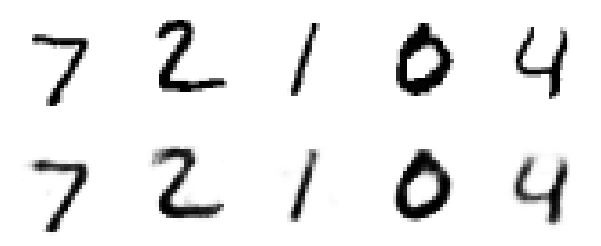

In [8]:
import matplotlib.pyplot as plt

def plot_reconstructions(model, images=X_test, n_images=5):
    reconstructions = np.clip(model.predict(images[:n_images]), 0, 1)
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plt.imshow(images[image_index], cmap="binary")
        plt.axis("off")
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plt.imshow(reconstructions[image_index], cmap="binary")
        plt.axis("off")
plot_reconstructions(ae)

In [9]:
ae.save('ae_stacked.keras')

In [10]:
encoder_cnn = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

decoder_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "VALID", activation="selu", input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding= "SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([28,28]),
])

ae_cnn = tf.keras.Sequential([encoder_cnn, decoder_cnn])
ae_cnn.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
history = ae_cnn.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0433 - mae: 0.1005 - val_loss: 0.0078 - val_mae: 0.0291
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0069 - mae: 0.0273 - val_loss: 0.0054 - val_mae: 0.0239
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0050 - mae: 0.0227 - val_loss: 0.0044 - val_mae: 0.0215
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0041 - mae: 0.0203 - val_loss: 0.0037 - val_mae: 0.0194
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0035 - mae: 0.0188 - val_loss: 0.0034 - val_mae: 0.0186


In [12]:
ae_cnn.evaluate(X_test, X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0033 - mae: 0.0181


[0.0032224978785961866, 0.01811356283724308]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


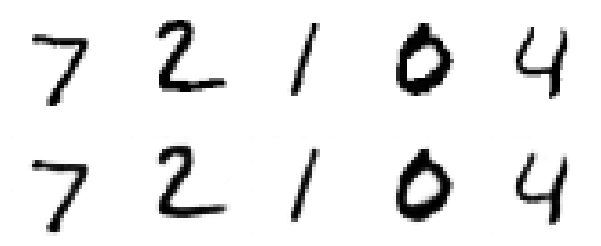

In [13]:
plot_reconstructions(ae_cnn)
plt.show()

In [14]:
ae_cnn.save('ae_conv.keras')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


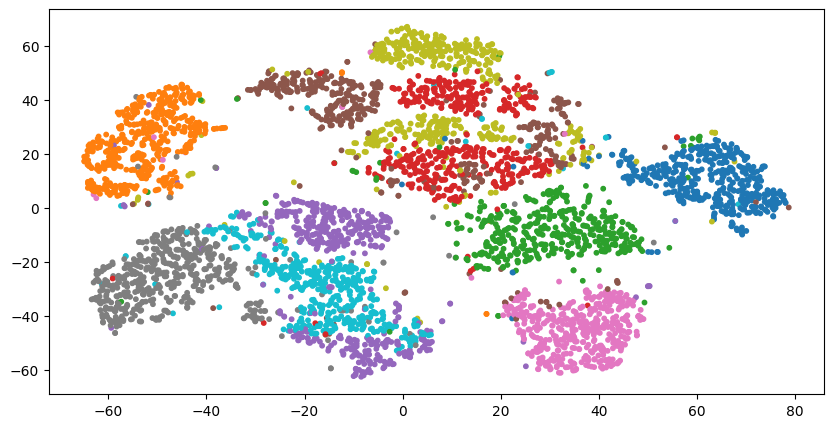

In [15]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder_cnn.predict(X_valid)
X_valid_compressed_flat = X_valid_compressed.reshape((X_valid_compressed.shape[0], -1))

tsne = TSNE(init="pca", learning_rate="auto", random_state=42)
X_valid_2D = tsne.fit_transform(X_valid_compressed_flat)

plt.figure(figsize=(10, 5))
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.show()

In [16]:
tsne.get_params()

{'angle': 0.5,
 'early_exaggeration': 12.0,
 'init': 'pca',
 'learning_rate': 'auto',
 'max_iter': None,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'metric_params': None,
 'min_grad_norm': 1e-07,
 'n_components': 2,
 'n_iter': 'deprecated',
 'n_iter_without_progress': 300,
 'n_jobs': None,
 'perplexity': 30.0,
 'random_state': 42,
 'verbose': 0}

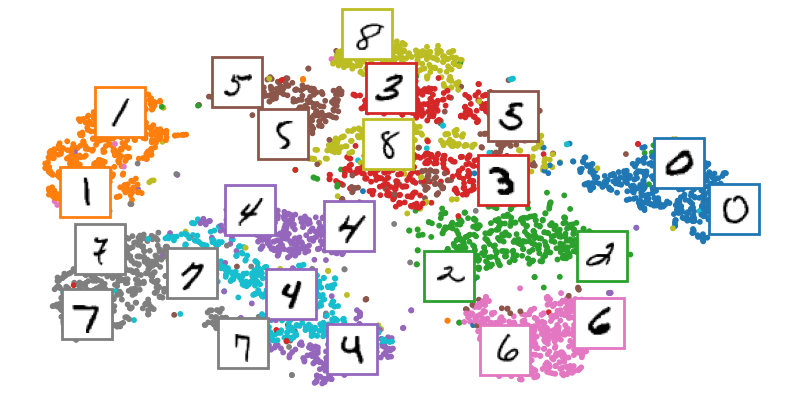

In [17]:
import matplotlib as mpl

plt.figure(figsize=(10, 5))
cmap = plt.cm.tab10
Z = X_valid_2D
Z = (Z - Z.min()) / (Z.max() - Z.min())
plt.scatter(Z[:, 0], Z[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(Z):
    dist = ((position - image_positions) ** 2).sum(axis=1)
    if dist.min() > 0.02:
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

In [18]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "VALID", activation="selu", input_shape=[3, 3, 64]),
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu"),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding= "SAME", activation="sigmoid"),
    tf.keras.layers.Reshape([28,28]),
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(optimizer="Adam", loss="mse", metrics=['mae'])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0424 - mae: 0.1011 - val_loss: 0.0741 - val_mae: 0.1065
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0111 - mae: 0.0363 - val_loss: 0.0761 - val_mae: 0.1075
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0096 - mae: 0.0330 - val_loss: 0.0765 - val_mae: 0.1077
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0089 - mae: 0.0314 - val_loss: 0.0764 - val_mae: 0.1078
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0084 - mae: 0.0303 - val_loss: 0.0705 - val_mae: 0.1034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


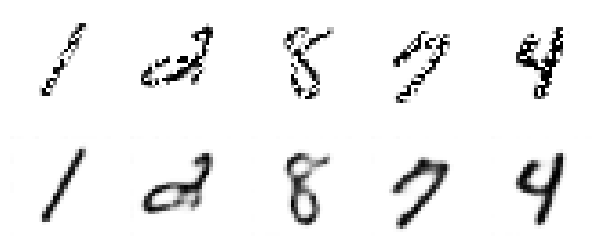

In [19]:
history = dropout_ae.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

dropout = tf.keras.layers.Dropout(0.3)
plot_reconstructions(dropout_ae, dropout(X_valid, training=True))

dropout_ae.save('ae_denoise.keras')

In [20]:
dropout_encoder_gaussian = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    tf.keras.layers.GaussianNoise(stddev=0.7),
    tf.keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
])

dropout_ae_gau = tf.keras.Sequential([dropout_encoder_gaussian, dropout_decoder])
dropout_ae_gau.compile(optimizer="Adam", loss="mse", metrics=['mae'])

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0390 - mae: 0.0898 - val_loss: 0.0106 - val_mae: 0.0399
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0212 - mae: 0.0591 - val_loss: 0.0095 - val_mae: 0.0366
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0198 - mae: 0.0561 - val_loss: 0.0088 - val_mae: 0.0345
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0191 - mae: 0.0546 - val_loss: 0.0086 - val_mae: 0.0342
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0187 - mae: 0.0539 - val_loss: 0.0087 - val_mae: 0.0337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


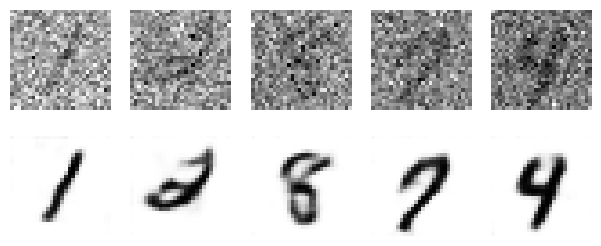

In [21]:
history = dropout_ae_gau.fit(X_train, X_train, epochs=5, validation_data=(X_valid, X_valid))

gaussian = tf.keras.layers.GaussianNoise(stddev=0.7) 
plot_reconstructions(dropout_ae_gau, gaussian(X_valid, training=True))

In [22]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train_full, y_train), (_, _) = cifar10
X_train_full = X_train_full.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]

In [23]:
print(X_train[0].shape)

(32, 32, 3)


In [24]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.1),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(256, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[1, 1, 256]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding= "SAME", activation="selu"), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (5-1) * 2 + 3 = 11 
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

c:\Users\User\OneDrive\Dokumenty\Machine-Learning\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [25]:
color = tf.keras.Sequential([encoder_color, decoder_color])
color.compile(loss="mae", optimizer="Adam", metrics=["mae"])

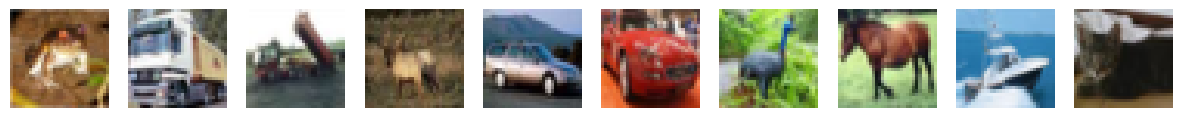

In [26]:
plt.figure(figsize=(10 * 1.5, 3))
for i in range(0, 10):
    plt.subplot(1, 10, 1+ i)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

In [27]:
history = color.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - loss: 0.1126 - mae: 0.1126 - val_loss: 0.1185 - val_mae: 0.1185
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 0.0759 - mae: 0.0759 - val_loss: 0.0877 - val_mae: 0.0877
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 43s 31ms/step - loss: 0.0697 - mae: 0.0697 - val_loss: 0.0737 - val_mae: 0.0737
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0776 - val_mae: 0.0776
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - loss: 0.0629 - mae: 0.0629 - val_loss: 0.0664 - val_mae: 0.0664


In [28]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.1),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(128, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[2, 2, 128]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (5-1) * 2 + 3 = 11 
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

In [29]:
color_less = tf.keras.Sequential([encoder_color, decoder_color])
color_less.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [30]:
history = color_less.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - loss: 0.0992 - mae: 0.0992 - val_loss: 0.0807 - val_mae: 0.0807
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - loss: 0.0652 - mae: 0.0652 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 0.0604 - mae: 0.0604 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0580 - mae: 0.0580 - val_loss: 0.0559 - val_mae: 0.0559
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0539 - val_mae: 0.0539


In [31]:
encoder_color = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = [32, 32, 3]),
    tf.keras.layers.GaussianNoise(stddev=0.1),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="selu", padding="SAME"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"),
])

decoder_color = tf.keras.Sequential([ 
    tf.keras.layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding= "SAME", activation="selu", input_shape=[4, 4, 64]), # (2-1) * 2 + 3 = 5
    tf.keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # (11-1) * 2 + 3 = 23
    tf.keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding= "SAME", activation="selu",), # 23 * 2 = 46
    tf.keras.layers.Conv2DTranspose(3, kernel_size=3, strides=1, padding= "SAME", activation="sigmoid",), # 46 * 1 = 46
    tf.keras.layers.Reshape([32, 32, 3]),
])

In [32]:
color_more_less = tf.keras.Sequential([encoder_color, decoder_color])
color_more_less.compile(loss="mae", optimizer="Adam", metrics=["mae"])

In [33]:
history = color_more_less.fit(X_train, X_train, validation_data=(X_valid, X_valid), epochs=5)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0891 - mae: 0.0891 - val_loss: 0.0695 - val_mae: 0.0695
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0614 - mae: 0.0614 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0579 - mae: 0.0579 - val_loss: 0.0630 - val_mae: 0.0630
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0562 - val_mae: 0.0562
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - loss: 0.0545 - mae: 0.0545 - val_loss: 0.0517 - val_mae: 0.0517


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2315562..1.170385].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19213375..1.260874].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16638738..1.3554733].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19212997..1.0350472].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21242402..1.1725707].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30055243..1.1438428].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.142

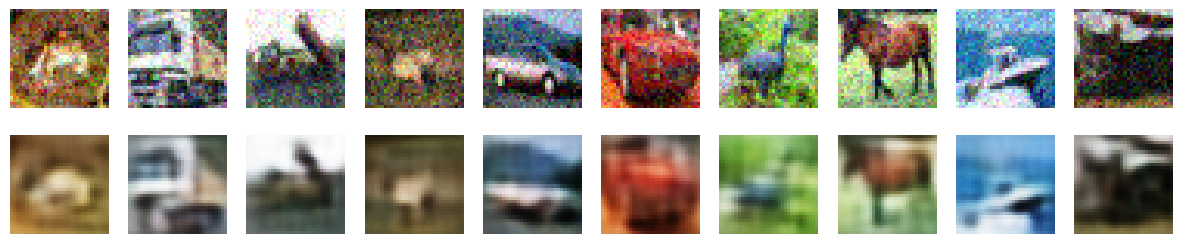

In [34]:
gaussian = tf.keras.layers.GaussianNoise(stddev=0.1) 

plot_reconstructions(color, gaussian(X_train, training=True), n_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1812858..1.2523193].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14777969..1.2755797].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.16305256..1.2616788].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19342297..1.048187].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26644278..1.1841147].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26207563..1.1103113].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.13

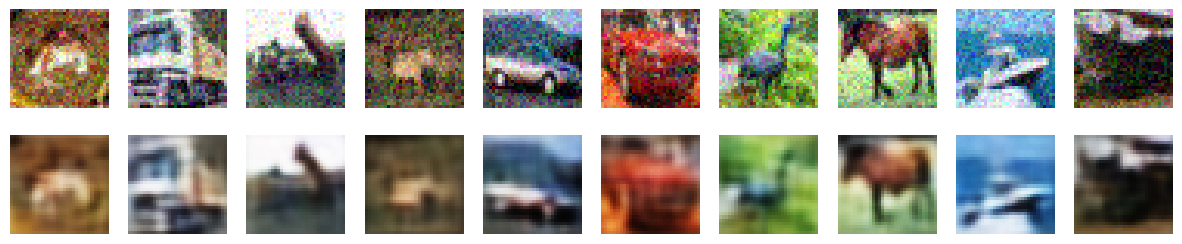

In [35]:
plot_reconstructions(color_less, gaussian(X_train, training=True), n_images=10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21614663..1.2078034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15493363..1.2156813].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14140643..1.3477373].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.14816579..1.0214225].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25478038..1.2059537].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25105354..1.1968706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.

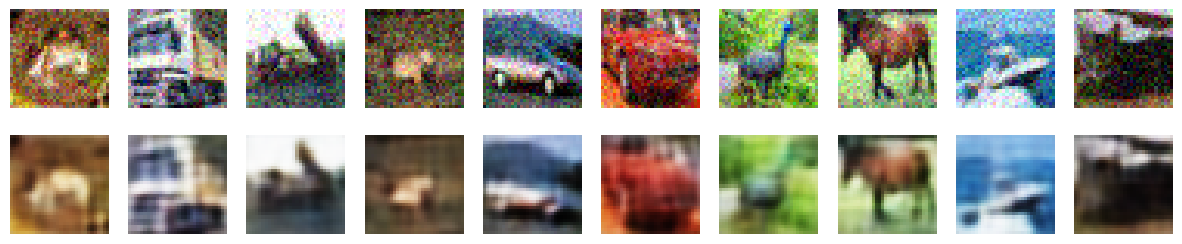

In [36]:
plot_reconstructions(color_more_less, gaussian(X_train, training=True), n_images=10)

In [37]:
#szczerze nwm ocb